Лабораторная 1 - 10 баллов (дедлайн 02.10.2023) 
Нужно сгенерировать 3 cлучайных нелинейных регрессии. Для обоих частей задания зафиксировать размерности 2-3х линейных слоев, их активации, функцию потери, lr и оптимизатор, кол-во эпох.
Первая часть задания: протестировать модель только с батчнормом с 3 разными размерами батча. 
Вторая часть: протестировать модель с лучшим размером батча из первой части 
1) без дропаута и без батчнорма, 
2) только с батчнормом без дропаута, 
3) только с дропаутом без батчнорма, 
4) и с батчнормом и с дропаутом.
Визуализировать результаты.
В пару предложений записать выводы.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

<img title="a title" alt="Alt text" src="assets/functions.png">

In [73]:
# 3 нелинейные регрессии
def regres_test(x):
    return x**2 * np.sin(4 * x) + x

def regres_1(x):
    return x**2 * np.sin(4 * x) + x

def regres_2(x):
    return ((x+1)**5)/5 - 2*(x**4) - 4*(x**3) + 6*(x**2) + 4*x

def regres_3(x):
    return 2 * np.sin(2 * np.pi * x + 1) + (x / 3)


<img title="a title" alt="Alt text" src="assets/gr1.png">
<img title="a title" alt="Alt text" src="assets/gr2.png">
<img title="a title" alt="Alt text" src="assets/gr3.png">

In [74]:
random_state = 55

In [75]:
def make_regression(func, x):
    r = np.random.RandomState(random_state)
    return [func(i) + r.normal(0, 1) for i in x]

def make_results(func, x):
    return [func(i) for i in x]

In [76]:
def get_random_x(a, b, size):
    r = np.random.RandomState(random_state)
    x = np.linspace(a, b, size)
    elements_to_delete = r.randint(len(x), size=int(len(x) / 100 * 50))
    np.delete(x, elements_to_delete)
    return x

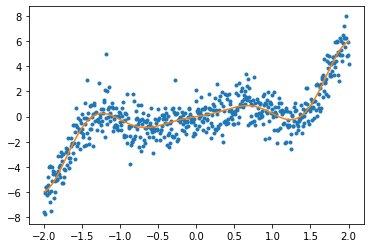

In [77]:
device = torch.device("cpu" if torch.cuda.is_available() else "cpu")
epoches = 1500
input_size = 1
output_size = 1
lr = 0.05
a = -2
b = 2
size = 600
X = get_random_x(a, b, size)
Xsq = torch.unsqueeze(torch.Tensor(X), dim=1).to(device)
y = make_regression(regres_test, X)
Ysq = torch.unsqueeze(torch.Tensor(y), dim=1).to(device)
y_true = make_results(regres_test, X)
plt.plot(X, y, '.')
plt.plot(X, y_true, '-')
plt.show()

Что есть в совокупности?
1. нейросеть - форвард и бэквард, линейные слои, функции активации
2. bias
3. функция потерь
4. обучение
5. ? оптимизатор SGD
6. learning rate 
7. эпохи
8. батчи
9. дропаут

Что мне нужно?
1. зафиксировать оптимизатор, lr, epochs, batch, dropout, слои, функцию активации
2. написать обучение, функцию потерь
3. слои нейросети

Какие этапы есть в создании нейросети?
1. сама нейросеть с использованием torch.nn.Module 

In [78]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.dropout = nn.Dropout(0.1)
        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(16)
        self.l1 = nn.Linear(input_size, 64)
        self.l2 = nn.Linear(64, 48)
        self.l3 = nn.Linear(48, output_size)
        self.act = nn.ReLU()
    def forward(self, x):
        x = self.l1(x)
        # x = self.dropout(x)
        # x = self.bn1(x)
        x = self.act(x)
        x = self.l2(x)
        # x = self.bn2(x)
        # x = self.dropout(x)
        x = self.act(x)
        x = self.l3(x)
        return x

net = NeuralNetwork(input_size=input_size, output_size=output_size)
net.to(device)
net

NeuralNetwork(
  (dropout): Dropout(p=0.1, inplace=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l1): Linear(in_features=1, out_features=64, bias=True)
  (l2): Linear(in_features=64, out_features=48, bias=True)
  (l3): Linear(in_features=48, out_features=1, bias=True)
  (act): ReLU()
)

In [109]:
class NeuralNetworkWithDropout(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetworkWithDropout, self).__init__()
        self.dropout = nn.Dropout(0.1)
        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(16)
        self.l1 = nn.Linear(input_size, 128)
        self.l2 = nn.Linear(128, 48)
        self.l3 = nn.Linear(48, output_size)
        self.act = nn.ReLU()
    def forward(self, x):
        x = self.dropout(x)
        x = self.l1(x)
        # x = self.bn1(x)
        x = self.act(x)
        x = self.l2(x)
        # x = self.bn2(x)
        x = self.dropout(x)
        x = self.act(x)
        x = self.l3(x)
        return x

netDropout = NeuralNetworkWithDropout(input_size=input_size, output_size=output_size)
netDropout.to(device)
netDropout

NeuralNetworkWithDropout(
  (dropout): Dropout(p=0.1, inplace=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l1): Linear(in_features=1, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=48, bias=True)
  (l3): Linear(in_features=48, out_features=1, bias=True)
  (act): ReLU()
)

In [110]:
from torch import optim

optimizer = optim.SGD(net.parameters(), lr=lr)
criterion = nn.MSELoss()

optimizerDropout = optim.SGD(netDropout.parameters(), lr=lr)
criterionDropout = nn.MSELoss()

In [92]:
tensor_y_true = torch.Tensor(y_true)

dataset_train = TensorDataset(Xsq, Ysq)
dataset_test = TensorDataset(Xsq, tensor_y_true)

dataloader_train = DataLoader(dataset_train, batch_size=100, shuffle=True)
dataloader_test = DataLoader(dataset_test)

In [102]:
def train(network, criterion, optimizer):
    losses = []
    for i in range(epoches):
        for j, batch in enumerate(dataloader_train):
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)

            output = network(inputs)
            optimizer.zero_grad()
            loss = criterion(output, targets)
            loss.backward()
            optimizer.step()

        if (i % 20 == 0):
            losses.append(loss.detach())
    
    plt.plot(losses)
    plt.show()
    


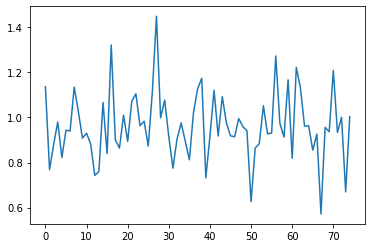

NeuralNetwork(
  (dropout): Dropout(p=0.1, inplace=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l1): Linear(in_features=1, out_features=64, bias=True)
  (l2): Linear(in_features=64, out_features=48, bias=True)
  (l3): Linear(in_features=48, out_features=1, bias=True)
  (act): ReLU()
)

In [94]:
net.train()
train(net, criterion, optimizer)
net.eval()

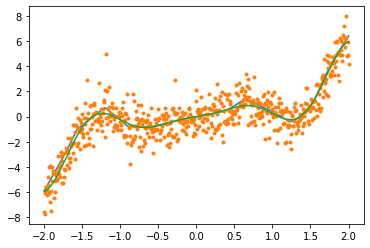

In [95]:
predict = net(Xsq).detach().numpy()
plt.plot(Xsq, predict, '-', Xsq, Ysq, '.', Xsq, y_true)
plt.show()

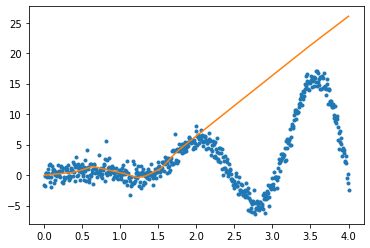

In [96]:
X1 = get_random_x(0, 4, size)
Xsq_temp = torch.unsqueeze(torch.Tensor(X1), dim=1)
ylast = make_regression(regres_test, X1)
Ysqlast = torch.unsqueeze(torch.Tensor(ylast), dim=1)
predict = net(Xsq_temp).detach().numpy()
plt.plot(Xsq_temp, Ysqlast, '.', Xsq_temp, predict)
plt.show()

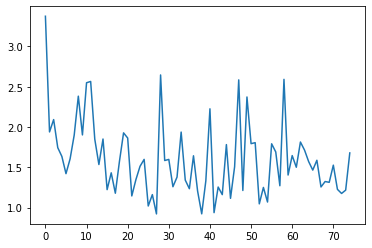

NeuralNetworkWithDropout(
  (dropout): Dropout(p=0.1, inplace=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l1): Linear(in_features=1, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=48, bias=True)
  (l3): Linear(in_features=48, out_features=1, bias=True)
  (act): ReLU()
)

In [112]:
netDropout.train()
train(netDropout, criterionDropout, optimizerDropout)
netDropout.eval()

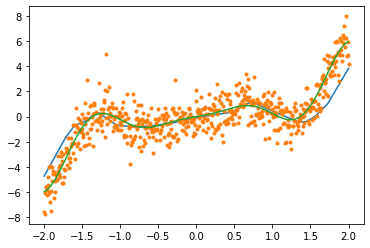

In [113]:
predictDropout = netDropout(Xsq).detach().numpy()
plt.plot(Xsq, predictDropout, '-', Xsq, Ysq, '.', Xsq, y_true)
plt.show()

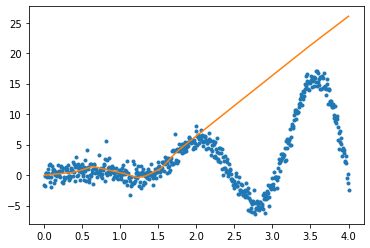

In [114]:
X1 = get_random_x(0, 4, size)
Xsq_temp = torch.unsqueeze(torch.Tensor(X1), dim=1)
ylast = make_regression(regres_test, X1)
Ysqlast = torch.unsqueeze(torch.Tensor(ylast), dim=1)
predictDropout = net(Xsq_temp).detach().numpy()
plt.plot(Xsq_temp, Ysqlast, '.', Xsq_temp, predictDropout)
plt.show()

In [89]:
import torch
torch.cuda.is_available()

True

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
